# 6.4 - Supervised Machine Learning: Regression

### Importing Data and Libraries

### Data Cleaning

### Data Prep for Regression Analysis

### Regression Analysis

### Comparing how the model fits the Training set

### 

### Importing Data and Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing Data
path = r'C:\Users\arafo\CareerFoundry\Hotel Booking Analysis'
df_checkedout = pd.read_csv(os.path.join(path, '02 - Data', 'Prepared Data', 'bookings_checkedout.csv'), index_col = False)

In [3]:
# Display all columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
# Ensure graphs displayed are in notebook without having to call them
%matplotlib inline

In [5]:
df_checkedout.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,region,waitlist_flag,total_guests
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,Europe,No Wait,2
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,Europe,No Wait,2
2,2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03,Portugal,Europe,No Wait,2
3,3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03,Portugal,Europe,No Wait,2
4,7,Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,145.0,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2


In [6]:
df_checkedout.shape

(61797, 33)

In [7]:
# Remove first column again
df_checkedout = df_checkedout.drop(['Unnamed: 0'], axis = 1)

In [8]:
df_checkedout.shape

(61797, 32)

### Data Cleaning

In [9]:
# Check for missing values
df_checkedout.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
average_daily_rate                0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

In [10]:
# Check for dupes
dupes = df_checkedout.duplicated()

In [11]:
dupes.shape

(61797,)

C:\Users\arafo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

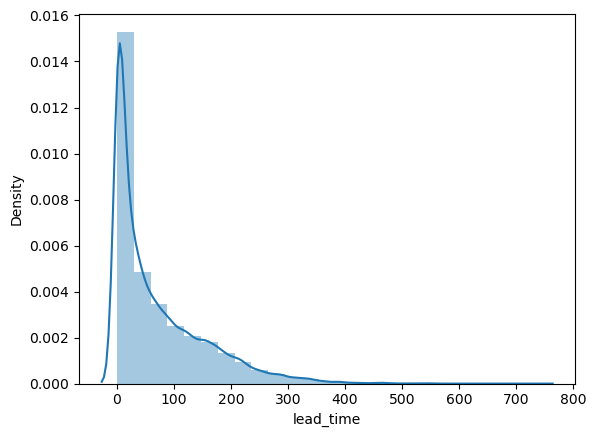

In [12]:
# Showing Extreme Values
sns.distplot(df_checkedout['lead_time'], bins=25, kde = True)

In [13]:
# Checking Mean, Median, and Max
df_checkedout['lead_time'].mean()

69.71853002572941

In [14]:
df_checkedout['lead_time'].median()

38.0

In [15]:
df_checkedout['lead_time'].max()

737

C:\Users\arafo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_daily_rate', ylabel='Density'>

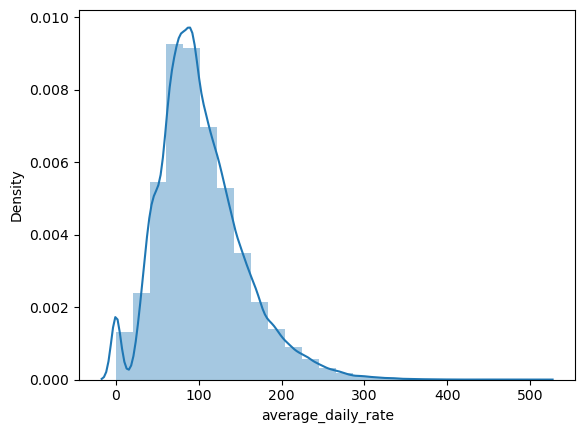

In [16]:
sns.distplot(df_checkedout['average_daily_rate'], bins=25, kde = True)

In [17]:
# Checking Mean, Median, and Max
df_checkedout['average_daily_rate'].mean()

102.80233231386383

In [18]:
df_checkedout['average_daily_rate'].median()

95.0

In [19]:
df_checkedout['average_daily_rate'].max()

510.0

In [20]:
# Deriving new variable for total stay time
df_checkedout['total_stay_time'] = df_checkedout['stays_in_weekend_nights'] + df_checkedout['stays_in_week_nights']

C:\Users\arafo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_stay_time', ylabel='Density'>

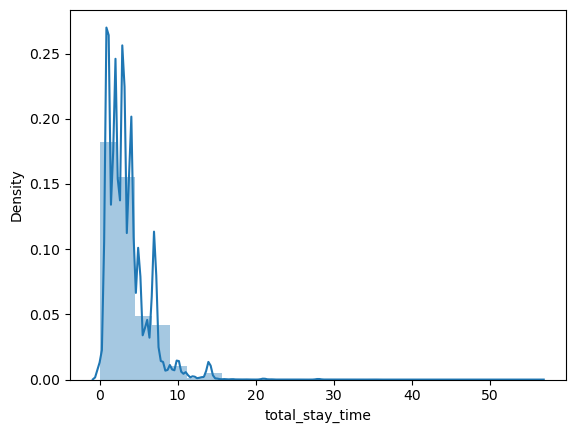

In [24]:
sns.distplot(df_checkedout['total_stay_time'], bins=25, kde = True)

In [28]:
# Checking mean, median, and max
df_checkedout['total_stay_time'].mean()

3.5050892438144245

In [29]:
df_checkedout['total_stay_time'].median()

3.0

In [30]:
df_checkedout['total_stay_time'].max()

56

### Data Prep for Regression Analysis

#### New Hypothesis

- The longer the stay, the higher the average daily rate.

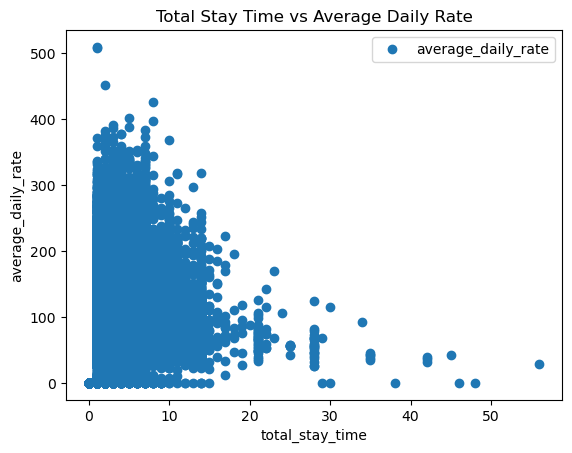

In [31]:
# Create a scatterplot using matplotlib

df_checkedout.plot(x = 'total_stay_time', y='average_daily_rate',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Stay Time vs Average Daily Rate')  
plt.xlabel('total_stay_time')  
plt.ylabel('average_daily_rate')  
plt.show()

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_checkedout['total_stay_time'].values.reshape(-1,1)
y = df_checkedout['average_daily_rate'].values.reshape(-1,1)

In [33]:
X

array([[0],
       [0],
       [2],
       ...,
       [7],
       [3],
       [2]], dtype=int64)

In [34]:
y

array([[  0.  ],
       [  0.  ],
       [107.  ],
       ...,
       [121.43],
       [183.33],
       [180.  ]])

In [35]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [36]:
# Create a regression object.
regression = LinearRegression()

In [37]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

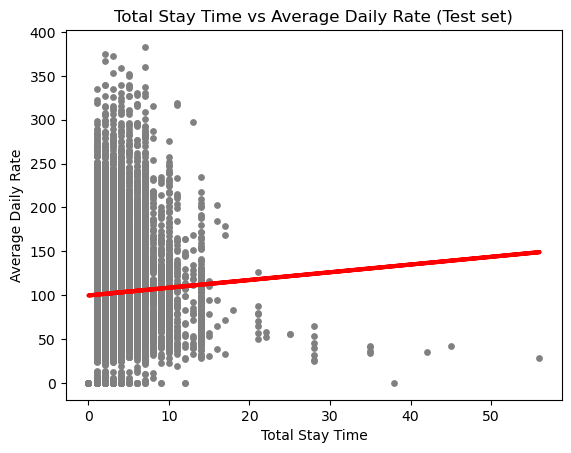

In [39]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Stay Time vs Average Daily Rate (Test set)')
plot_test.xlabel('Total Stay Time')
plot_test.ylabel('Average Daily Rate')
plot_test.show()

In [40]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

- Based on the placement of the regression line, I would assume this is a very bad fit. Most of the plotted data is on the left side of the scatterplot, so I would have assumed a more vertical line to fit the data. I assume this placement is because of all of the outliers in regards to total_stay_time.

In [41]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.88050999]]
Mean squared error:  2641.100403711489
R2 score:  0.0025956931850442677


In [42]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,163.00,104.995074
1,204.00,101.473034
2,125.50,107.636604
3,194.20,105.875584
4,94.50,102.353544
5,76.24,100.592524
6,91.81,104.114564
7,139.50,101.473034
8,96.30,102.353544
9,85.33,102.353544


### Comparing how the model fits the Training set

In [44]:
# Predict.
y_predicted_train = regression.predict(X_train)

In [45]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [46]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.88050999]]
Mean squared error:  2622.235294902722
R2 score:  0.0020642380197057886


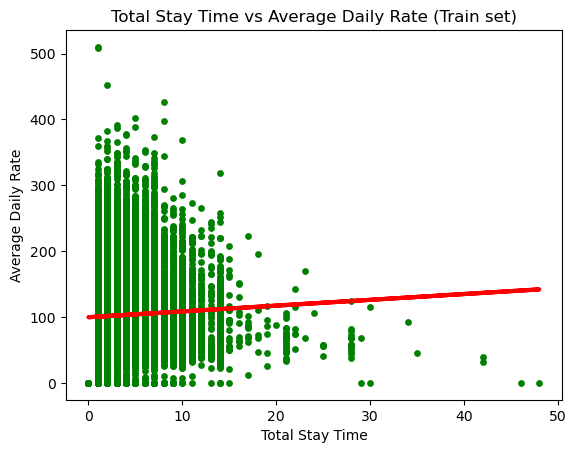

In [47]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Stay Time vs Average Daily Rate (Train set)')
plot_test.xlabel('Total Stay Time')
plot_test.ylabel('Average Daily Rate')
plot_test.show()

- After looking into the Root Mean Squared Error and R-Squared Values for both the test set and the training set, I can say without a doubt that the regression line is a horrible fit. The MSE error is huge compared to the data we have, and the R2 score is almost 0, indicating that it is indeed a poor fit.

### Bonus: Removing Outliers in Total Stay Time.

<AxesSubplot:>

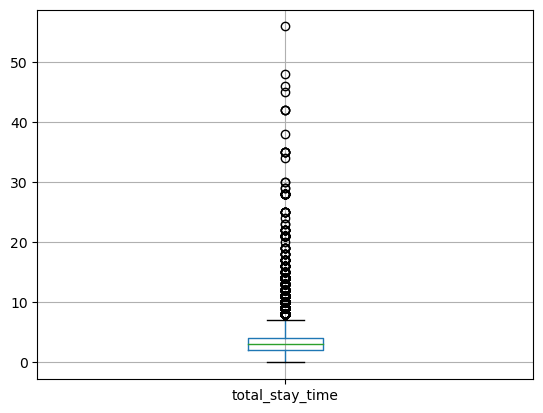

In [48]:
df_checkedout.boxplot(column=['total_stay_time'])

In [49]:
df_test = df_checkedout[df_checkedout['total_stay_time'] <=30] 

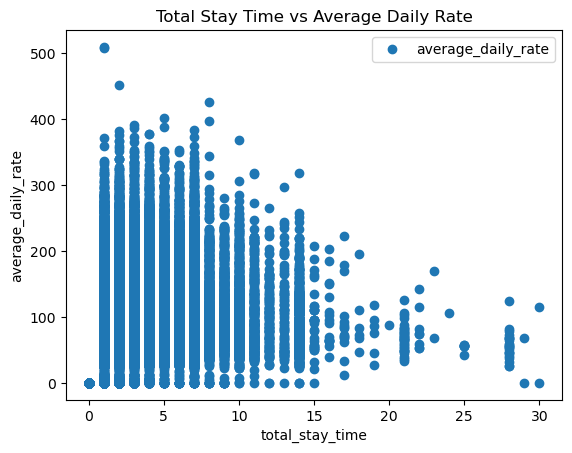

In [50]:
# Create a scatterplot using matplotlib
df_test.plot(x = 'total_stay_time', y='average_daily_rate',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Stay Time vs Average Daily Rate')  
plt.xlabel('total_stay_time')  
plt.ylabel('average_daily_rate')  
plt.show()

In [51]:
# Reshape

X2 = df_test['total_stay_time'].values.reshape(-1,1)
y2 = df_test['average_daily_rate'].values.reshape(-1,1)

In [53]:
# Re-Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [54]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train2, y_train2)

LinearRegression()

In [55]:
# Predict.
y_predicted2 = regression.predict(X_test2)

In [56]:
rmse = mean_squared_error(y_test2, y_predicted2)
r2 = r2_score(y_test2, y_predicted2)

In [57]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.01527837]]
Mean squared error:  2580.3587958956814
R2 score:  0.0031493689412636083


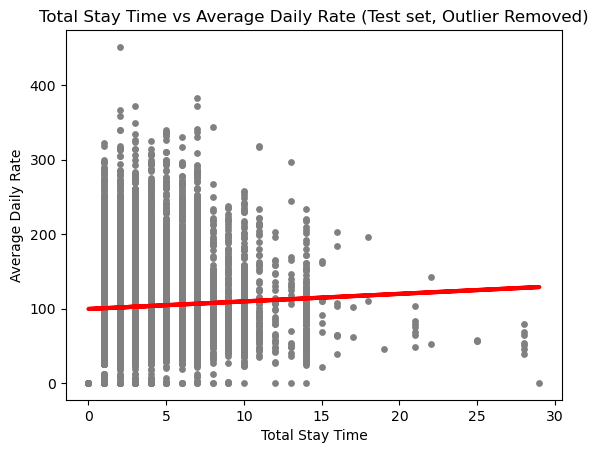

In [58]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test2, y_test2, color='gray', s = 15)
plot_test.plot(X_test2, y_predicted2, color='red', linewidth =3)
plot_test.title('Total Stay Time vs Average Daily Rate (Test set, Outlier Removed)')
plot_test.xlabel('Total Stay Time')
plot_test.ylabel('Average Daily Rate')
plot_test.show()

In [59]:
data = pd.DataFrame({'Actual': y_test2.flatten(), 'Predicted': y_predicted2.flatten()})
data.head(30)

,Actual,Predicted
0,89.25,103.441635
1,174.42,102.426356
2,62.00,101.411078
3,54.00,100.395799
4,151.71,106.487470
5,84.00,101.411078
6,199.00,103.441635
7,81.96,106.487470
8,48.00,100.395799
9,137.70,102.426356


- Even after removing some outliers in Total Stay Time, the Root Mean Square Error and R2 score remained similar to previous tests. I think I am able to conclude that the total length of the stay does not affect the average daily rate.

In [ ]:
# Exporting
df_checkedout.to_csv(os.path.join(path, '02 - Data','Prepared Data', 'bookings_checkedout_after_regression.csv'))